In [1]:
import numpy as np
import plotly.graph_objects
from IPython.display import display, YouTubeVideo, HTML
#from ipywidgets import interactive_output, VBox, HBox, IntSlider, SelectionSlider


In [2]:
mydefault = plotly.graph_objects.layout.Template()
mydefault.layout.xaxis.showgrid = False
mydefault.layout.yaxis.showgrid = False
mydefault.layout.xaxis.showline = True
mydefault.layout.yaxis.showline = True
mydefault.layout.yaxis.linewidth = 2
mydefault.layout.xaxis.ticks = "outside"
mydefault.layout.yaxis.ticks = "outside"
mydefault.layout.hovermode = False
mydefault.layout.dragmode = "pan"
mydefault.layout.scene.hovermode = False
mydefault.layout.xaxis.showspikes = False
mydefault.layout.yaxis.showspikes = False
mydefault.layout.scene.xaxis.showspikes = False
mydefault.layout.scene.yaxis.showspikes = False
mydefault.layout.scene.zaxis.showspikes = False
plotly.io.templates["mydefault"] = mydefault
plotly.io.templates.default = "mydefault"


In [3]:
%%html
<!-- To disable the modebar IN ALL PLOT.LY PLOTS -->
<style>
.modebar {
    display: none !important;
}
</style>

In [4]:
def transformation_matrix(M):
    columns = []
    for evalue, evecs, mult in M.eigenvectors_right():
        if evalue.imag() < 0:
            continue
        if evalue.imag():
            for evec in evecs:
                u = vector(RDF, [a.real() for a in evec])
                v = vector(RDF, [a.imag() for a in evec])
                columns.append(u)
                columns.append(v)
        else:
            for v in evecs:
                columns.append(vector(RDF, v))
    return column_matrix(columns)

In [5]:
def make_block_diagonal(M):
    dim = M.dimensions()[0]
    blocks = []
    i = 0
    while i < dim:
        size = 2 if (i+1 < dim and M[i,i+1] != 0) else 1
        blocks.append(M[i:i+size,i:i+size])
        i += size
    return block_diagonal_matrix(*blocks)

In [6]:
def round_complex(z, digits):
    if z.imag_part():
        return round(z.real_part(), digits) + round(z.imag_part(), digits) * I
    return round(z, digits)

In [7]:
def latex_vector(v, round=None):
    if round is None:
        result = column_matrix(v)
    else:
        result = column_matrix(RDF, v).round(round)
    result = latex(result).replace("left(", "left[").replace("right)", "right]")
    return LatexExpr(result)

In [8]:
life_stages = LatexExpr(r"""\left[ \begin{array}{c}
    \text{Eggs/hatchlings} \\
    \text{Small juveniles} \\
    \text{Large juveniles} \\
    \text{Subadults} \\
    \text{Novice breeders} \\
    \text{1st-year remigrants} \\
    \text{Mature breeders}
\end{array} \right] = """)


In [9]:
def discrete_linear_interactive(M, initial_state, **options):
    max_t = options.get("max_t", 100)
    pre_text = options.get("pre_text", "")
    post_text = options.get("post_text", "")
    show_distribution = options.get("show_distribution", False)
    font_size = options.get("font_size", 18)
    fig_height = options.get("fig_height", 250)
    solution = [vector(initial_state)]
    for t in range(max_t):
        solution.append(M * solution[-1])

    fig = plotly.graph_objects.FigureWidget()
    fig.layout.xaxis.visible = False
    fig.layout.yaxis.visible = False
    fig.layout.height = fig_height
    fig.layout.margin = dict(b=10, t=10, l=10, r=10)
    text = "${}$".format(pre_text + latex_vector(solution[0], round=2))
    fig.add_annotation(showarrow=False, font_size=font_size, x=0, y=1, 
                       xref="paper", yref="paper", xanchor="left", yanchor="top")
    annotation = fig.layout.annotations[-1]

    @interact(t=slider(0, max_t, 1, label="$t$"))
    def update(t):
        text = pre_text + latex_vector(solution[t], round=2)
        if show_distribution:
            percentages = 100 * solution[t].normalized(1)
            text += r" \hspace{6em} \text{Percentages: } "
            text += latex_vector(percentages, 1)
        annotation.text = "${}$".format(text + post_text)

    return fig


**A model of the worldwide population of loggerhead sea turtles**

From the paper “A stage-based population model for loggerhead sea turtles and implications for conservation”, by Deborah Crouse, Larry Crowder, and Hal Caswell, published in the journal *Ecology*, 1987. 

Seven life stages: 

1. Hatchlings (less than 1 year old)
1. Small juveniles (age 1–7 years)
1. Large juveniles (age 8–15 years)
1. Subadults (age 16–21 years)
1. Novice breeders (age 22 years)
1. First-year remigrants (age 23 years)
1. Mature breeders (age 24–54 years)


In [10]:
C = matrix(RDF, [
    [0,      0,      0,      0,      127,      4,      80     ],
    [0.6747, 0.7370, 0,      0,        0,      0,       0     ],
    [0,      0.0486, 0.6610, 0,        0,      0,       0     ],
    [0,      0,      0.0147, 0.6907,   0,      0,       0     ],
    [0,      0,      0,      0.0518,   0,      0,       0     ],
    [0,      0,      0,      0,        0.8091, 0,       0     ],
    [0,      0,      0,      0,        0,      0.8091,  0.8089],
])
show(r"C = " + latex(C))

C = \left(\begin{array}{rrrrrrr}
0.0 & 0.0 & 0.0 & 0.0 & 127.0 & 4.0 & 80.0 \\
0.6747 & 0.737 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0486 & 0.661 & 0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0147 & 0.6907 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0518 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.8091 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.8091 & 0.8089
\end{array}\right)

In [11]:
show(LatexExpr(r"\text{Eigenvalues of $C$:}"))
for evalue in C.eigenvalues():
    show(round_complex(evalue, 4))

\text{Eigenvalues of $C$:}

-0.0884 + 0.1196*I

-0.0884 - 0.1196*I

0.2655

0.3717

0.7462 + 0.2131*I

0.7462 - 0.2131*I

0.945

In [12]:
T = transformation_matrix(C)
show(r"T = " + latex(T.round(4)))

T = \left(\begin{array}{rrrrrrr}
-0.7768 & 0.0 & -0.57 & -0.471 & -0.0127 & -0.2951 & 0.2908 \\
0.6219 & 0.0901 & 0.8155 & 0.8699 & -0.9345 & 0.0 & 0.943 \\
-0.0384 & -0.012 & -0.1002 & -0.1461 & -0.0735 & 0.1838 & 0.1614 \\
0.0007 & 0.0003 & 0.0035 & 0.0067 & 0.0106 & 0.0078 & 0.0093 \\
-0.0 & -0.0003 & 0.0007 & 0.0009 & 0.0008 & 0.0003 & 0.0005 \\
-0.001 & 0.001 & 0.0021 & 0.002 & 0.0009 & 0.0001 & 0.0004 \\
0.001 & -0.0008 & -0.0031 & -0.0038 & -0.0007 & -0.0033 & 0.0026
\end{array}\right)

In [13]:
D = T.inverse()*C*T
show(r"\tilde{D} = " + latex(D.round(4)))

\tilde{D} = \left(\begin{array}{rrrrrrr}
-0.0884 & 0.1196 & -0.0 & -0.0 & 0.0 & 0.0 & 0.0 \\
-0.1196 & -0.0884 & -0.0 & -0.0 & -0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.2655 & -0.0 & -0.0 & 0.0 & 0.0 \\
-0.0 & -0.0 & 0.0 & 0.3717 & 0.0 & -0.0 & -0.0 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.7462 & 0.2131 & -0.0 \\
0.0 & -0.0 & 0.0 & -0.0 & -0.2131 & 0.7462 & 0.0 \\
-0.0 & 0.0 & -0.0 & 0.0 & -0.0 & -0.0 & 0.945
\end{array}\right)

In [14]:
show(r"\tilde{D} = " + latex(make_block_diagonal(D.round(4))))

\tilde{D} = \left(\begin{array}{rr|r|r|rr|r}
-0.0884 & 0.1196 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
-0.1196 & -0.0884 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
\hline
 0.0 & 0.0 & 0.2655 & 0.0 & 0.0 & 0.0 & 0.0 \\
\hline
 0.0 & 0.0 & 0.0 & 0.3717 & 0.0 & 0.0 & 0.0 \\
\hline
 0.0 & 0.0 & 0.0 & 0.0 & 0.7462 & 0.2131 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 & -0.2131 & 0.7462 & 0.0 \\
\hline
 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.945
\end{array}\right)

In [15]:
show(LatexExpr(r"\text{The absolute values of the eigenvalues:}"))
for evalue in C.eigenvalues():
    if evalue.imag() or evalue < 0:
        show(r"|" + latex(round_complex(evalue, 4)) + r"| = " + latex(round(abs(evalue), 4)))
    else:
        show(round(abs(evalue), 4))

\text{The absolute values of the eigenvalues:}

| -0.0884 + 0.1196i | = 0.1488

| -0.0884 - 0.1196i | = 0.1488

0.2655

0.3717

| 0.7462 + 0.2131i | = 0.776

| 0.7462 - 0.2131i | = 0.776

0.945

In [16]:
state = vector([100.0] * 7)
discrete_linear_interactive(C, state, pre_text=life_stages)


/ext/sage/9.8/local/var/lib/sage/venv-python3.11.1/lib/python3.11/site-packages/plotly/graph_objects/__init__.py:288: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(ipywidgets.__version__) >= LooseVersion("7.0.0"):


Interactive function <function discrete_linear_interactive.<locals>.update at 0x7fe08dd774c0> with 1 widget
  …

FigureWidget({
    'data': [],
    'layout': {'annotations': [{'font': {'size': 18},
                                'showarrow': False,
                                'text': ('$\\left[ \\begin{array}{c}\n    \\' ... '0 \\\\\n100.0\n\\end{array}\\right]$'),
                                'x': 0,
                                'xanchor': 'left',
                                'xref': 'paper',
                                'y': 1,
                                'yanchor': 'top',
                                'yref': 'paper'}],
               'height': 250,
               'margin': {'b': 10, 'l': 10, 'r': 10, 't': 10},
               'template': '...',
               'xaxis': {'visible': False},
               'yaxis': {'visible': False}}
})

In [17]:
state = vector([100.0] * 7)
discrete_linear_interactive(C, state, pre_text=life_stages, show_distribution=True)

/ext/sage/9.8/local/var/lib/sage/venv-python3.11.1/lib/python3.11/site-packages/plotly/graph_objects/__init__.py:288: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



Interactive function <function discrete_linear_interactive.<locals>.update at 0x7fe0ec387920> with 1 widget
  …

FigureWidget({
    'data': [],
    'layout': {'annotations': [{'font': {'size': 18},
                                'showarrow': False,
                                'text': ('$\\left[ \\begin{array}{c}\n    \\' ... '.3 \\\\\n14.3\n\\end{array}\\right]$'),
                                'x': 0,
                                'xanchor': 'left',
                                'xref': 'paper',
                                'y': 1,
                                'yanchor': 'top',
                                'yref': 'paper'}],
               'height': 250,
               'margin': {'b': 10, 'l': 10, 'r': 10, 't': 10},
               'template': '...',
               'xaxis': {'visible': False},
               'yaxis': {'visible': False}}
})

**Protecting eggs, nests, and baby sea turtles**

<center>
<img src="images/IMAG1835.jpg" alt="A loggerhead nest, protected by a plastic cage" width="1050" />
<br><span style="font-size: 50%">Bald Head Island, NC<br>August, 2016</span>
</center>


**Protecting eggs, nests, and baby sea turtles**

<center>
<img src="images/IMAG1836.jpg" alt="Guide rails leading from the nest to the ocean" width="360" />
<br><span style="font-size: 50%">Bald Head Island, NC<br>August, 2016</span>
</center>


**Protecting eggs, nests, and baby sea turtles**

<center>
<img src="images/IMAG1933.jpg" alt="Excavating a loggerhead sea turtle nest" width="1050" />
<br><span style="font-size: 50%">Bald Head Island, NC<br>August, 2016</span>
</center>


**Protecting eggs, nests, and baby sea turtles**

<center>
<img src="images/IMAG1934.jpg" alt="Unhatched eggs found while excavating a nest" width="1050" />
<br><span style="font-size: 50%">Bald Head Island, NC<br>August, 2016</span>
</center>


**Protecting eggs, nests, and baby sea turtles**

<center>
<img src="images/IMAG1927.jpg" alt="A live straggler found while excavating a nest!" width="1050" />
<br><span style="font-size: 50%">Bald Head Island, NC<br>August, 2016</span>
</center>


**Protecting eggs, nests, and baby sea turtles**

<center>
<img src="images/IMAG1929.jpg" alt="A live straggler found while excavating a nest!" width="1050" />
<br><span style="font-size: 50%">Bald Head Island, NC<br>August, 2016</span>
</center>


**What if we do everything we can to protect eggs, nests, and baby sea turtles?**

(And what if that's all we do?) 


In [18]:
C2 = matrix(RDF, [
    [0,      0,      0,      0,      150,      6,     100     ],
    [0.6747, 0.7370, 0,      0,        0,      0,       0     ],
    [0,      0.0486, 0.6610, 0,        0,      0,       0     ],
    [0,      0,      0.0147, 0.6907,   0,      0,       0     ],
    [0,      0,      0,      0.0518,   0,      0,       0     ],
    [0,      0,      0,      0,        0.8091, 0,       0     ],
    [0,      0,      0,      0,        0,      0.8091,  0.8089],
])
show(r"C_2 = " + latex(C2))

C_2 = \left(\begin{array}{rrrrrrr}
0.0 & 0.0 & 0.0 & 0.0 & 150.0 & 6.0 & 100.0 \\
0.6747 & 0.737 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0486 & 0.661 & 0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0147 & 0.6907 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0518 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.8091 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.8091 & 0.8089
\end{array}\right)

**The difference between this matrix, $C_2$, and the original one, $C$:**

In [19]:
show(r"C_2 - C = " + latex(C2 - C))

C_2 - C = \left(\begin{array}{rrrrrrr}
0.0 & 0.0 & 0.0 & 0.0 & 23.0 & 2.0 & 20.0 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0
\end{array}\right)

In [20]:
show(LatexExpr(r"\text{Eigenvalues of $C_2$:}"))
for evalue in C2.eigenvalues():
    show(round_complex(evalue, 5))

\text{Eigenvalues of $C_2$:}

-0.09492 + 0.12621*I

-0.09492 - 0.12621*I

0.3165 + 0.07173*I

0.3165 - 0.07173*I

0.7495 + 0.22485*I

0.7495 - 0.22485*I

0.95545

In [21]:
T2 = transformation_matrix(C2)
D2 = T2.inverse()*C2*T2
show(r"\tilde{D}_2 = " + latex(make_block_diagonal(D2.round(5))))

\tilde{D}_2 = \left(\begin{array}{rr|rr|rr|r}
-0.09492 & 0.12621 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
-0.12621 & -0.09492 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
\hline
 0.0 & 0.0 & 0.3165 & 0.07173 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & -0.07173 & 0.3165 & 0.0 & 0.0 & 0.0 \\
\hline
 0.0 & 0.0 & 0.0 & 0.0 & 0.7495 & 0.22485 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 & -0.22485 & 0.7495 & 0.0 \\
\hline
 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.95545
\end{array}\right)

In [22]:
show(LatexExpr(r"\text{The absolute values of the eigenvalues:}"))
for evalue in C2.eigenvalues():
    if evalue.imag() or evalue < 0:
        show(r"|" + latex(round_complex(evalue, 4)) + r"| = " + latex(round(abs(evalue), 4)))
    else:
        show(round(abs(evalue), 4))

\text{The absolute values of the eigenvalues:}

| -0.0949 + 0.1262i | = 0.1579

| -0.0949 - 0.1262i | = 0.1579

| 0.3165 + 0.0717i | = 0.3245

| 0.3165 - 0.0717i | = 0.3245

| 0.7495 + 0.2249i | = 0.7825

| 0.7495 - 0.2249i | = 0.7825

0.9554

In [23]:
state = vector([100.0] * 7)
discrete_linear_interactive(C2, state, pre_text=life_stages)


Interactive function <function discrete_linear_interactive.<locals>.update at 0x7fe096c0b560> with 1 widget
  …

FigureWidget({
    'data': [],
    'layout': {'annotations': [{'font': {'size': 18},
                                'showarrow': False,
                                'text': ('$\\left[ \\begin{array}{c}\n    \\' ... '0 \\\\\n100.0\n\\end{array}\\right]$'),
                                'x': 0,
                                'xanchor': 'left',
                                'xref': 'paper',
                                'y': 1,
                                'yanchor': 'top',
                                'yref': 'paper'}],
               'height': 250,
               'margin': {'b': 10, 'l': 10, 'r': 10, 't': 10},
               'template': '...',
               'xaxis': {'visible': False},
               'yaxis': {'visible': False}}
})

In [24]:
state = vector([100.0] * 7)
discrete_linear_interactive(C2, state, pre_text=life_stages, show_distribution=True)


Interactive function <function discrete_linear_interactive.<locals>.update at 0x7fe08dda7e20> with 1 widget
  …

FigureWidget({
    'data': [],
    'layout': {'annotations': [{'font': {'size': 18},
                                'showarrow': False,
                                'text': ('$\\left[ \\begin{array}{c}\n    \\' ... '.3 \\\\\n14.3\n\\end{array}\\right]$'),
                                'x': 0,
                                'xanchor': 'left',
                                'xref': 'paper',
                                'y': 1,
                                'yanchor': 'top',
                                'yref': 'paper'}],
               'height': 250,
               'margin': {'b': 10, 'l': 10, 'r': 10, 't': 10},
               'template': '...',
               'xaxis': {'visible': False},
               'yaxis': {'visible': False}}
})

# That didn't work. ☹

<br>
<br>

**Conclusion, so far:** Protecting eggs, nests, hatchlings ***isn't enough*** by itself. 


**What if, instead, we protect the juvenile turtles, and especially the older juveniles?**


In [25]:
C3 = matrix(RDF, [
    [0,      0,      0,      0,      127,      4,      80     ],
    [0.6747, 0.7470, 0,      0,        0,      0,       0     ],
    [0,      0.0531, 0.7597, 0,        0,      0,       0     ],
    [0,      0,      0.0403, 0.7289,   0,      0,       0     ],
    [0,      0,      0,      0.0710,   0,      0,       0     ],
    [0,      0,      0,      0,        0.8091, 0,       0     ],
    [0,      0,      0,      0,        0,      0.8091,  0.8089],
])
show(r"C_3 = " + latex(C3))

C_3 = \left(\begin{array}{rrrrrrr}
0.0 & 0.0 & 0.0 & 0.0 & 127.0 & 4.0 & 80.0 \\
0.6747 & 0.747 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0531 & 0.7597 & 0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0403 & 0.7289 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.071 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.8091 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.8091 & 0.8089
\end{array}\right)

**The difference between this third matrix, $C_3$, and the original one, $C$:**

In [26]:
show(r"C_3 - C = " + latex((C3 - C).round(5)))

C_3 - C = \left(\begin{array}{rrrrrrr}
0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.01 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0045 & 0.0987 & 0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0256 & 0.0382 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0192 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0
\end{array}\right)

In [27]:
show(LatexExpr(r"\text{Eigenvalues of $C_3$:}"))
for evalue in C3.eigenvalues():
    show(round_complex(evalue, 5))

\text{Eigenvalues of $C_3$:}

-0.13101 + 0.16979*I

-0.13101 - 0.16979*I

1.05704

0.79315 + 0.2994*I

0.79315 - 0.2994*I

0.33159 + 0.18977*I

0.33159 - 0.18977*I

In [28]:
T3 = transformation_matrix(C3)
D3 = T3.inverse()*C3*T3
show(r"\tilde{D}_3 = " + latex(make_block_diagonal(D3.round(5))))

\tilde{D}_3 = \left(\begin{array}{rr|r|rr|rr}
-0.13101 & 0.16979 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
-0.16979 & -0.13101 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
\hline
 0.0 & 0.0 & 1.05704 & 0.0 & 0.0 & 0.0 & 0.0 \\
\hline
 0.0 & 0.0 & 0.0 & 0.79315 & 0.2994 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & -0.2994 & 0.79315 & 0.0 & 0.0 \\
\hline
 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.33159 & 0.18977 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.0 & -0.18977 & 0.33159
\end{array}\right)

In [29]:
show(LatexExpr(r"\text{The absolute values of the eigenvalues:}"))
for evalue in C3.eigenvalues():
    if evalue.imag() or evalue < 0:
        show(r"|" + latex(round_complex(evalue, 4)) + r"| = " + latex(round(abs(evalue), 4)))
    else:
        show(round(abs(evalue), 4))

\text{The absolute values of the eigenvalues:}

| -0.131 + 0.1698i | = 0.2145

| -0.131 - 0.1698i | = 0.2145

1.057

| 0.7931 + 0.2994i | = 0.8478

| 0.7931 - 0.2994i | = 0.8478

| 0.3316 + 0.1898i | = 0.3821

| 0.3316 - 0.1898i | = 0.3821

In [30]:
state = vector([100.0] * 7)
discrete_linear_interactive(C3, state, pre_text=life_stages)


Interactive function <function discrete_linear_interactive.<locals>.update at 0x7fe096c8f060> with 1 widget
  …

FigureWidget({
    'data': [],
    'layout': {'annotations': [{'font': {'size': 18},
                                'showarrow': False,
                                'text': ('$\\left[ \\begin{array}{c}\n    \\' ... '0 \\\\\n100.0\n\\end{array}\\right]$'),
                                'x': 0,
                                'xanchor': 'left',
                                'xref': 'paper',
                                'y': 1,
                                'yanchor': 'top',
                                'yref': 'paper'}],
               'height': 250,
               'margin': {'b': 10, 'l': 10, 'r': 10, 't': 10},
               'template': '...',
               'xaxis': {'visible': False},
               'yaxis': {'visible': False}}
})

In [31]:
state = vector([100.0] * 7)
discrete_linear_interactive(C3, state, pre_text=life_stages, show_distribution=True)


Interactive function <function discrete_linear_interactive.<locals>.update at 0x7fe08ddc3c40> with 1 widget
  …

FigureWidget({
    'data': [],
    'layout': {'annotations': [{'font': {'size': 18},
                                'showarrow': False,
                                'text': ('$\\left[ \\begin{array}{c}\n    \\' ... '.3 \\\\\n14.3\n\\end{array}\\right]$'),
                                'x': 0,
                                'xanchor': 'left',
                                'xref': 'paper',
                                'y': 1,
                                'yanchor': 'top',
                                'yref': 'paper'}],
               'height': 250,
               'margin': {'b': 10, 'l': 10, 'r': 10, 't': 10},
               'template': '...',
               'xaxis': {'visible': False},
               'yaxis': {'visible': False}}
})

# Success! ☺

<br>
<br>

**New conclusion:** We must protect juveniles, and especially larger juveniles. 


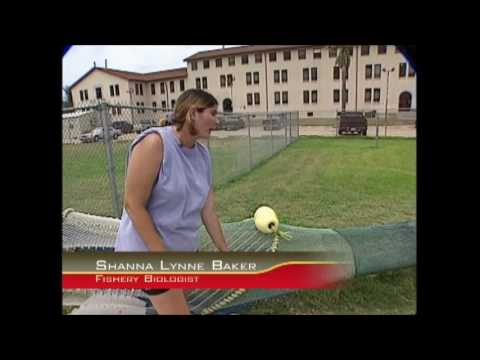

In [32]:
display(YouTubeVideo("hIJvSymWsCc", start=62))

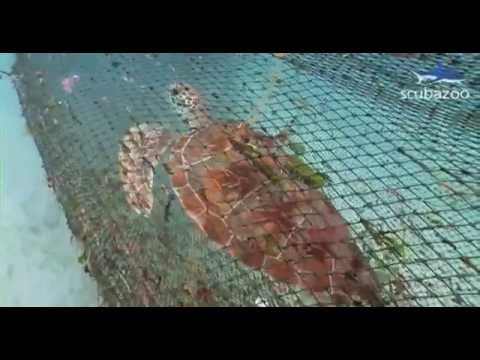

In [33]:
display(YouTubeVideo("y71cgxmyMO4", start=246))

**The happy ending to this story:**

This paper was published in 1987. That same year, the U.S. Congress passed a law requiring all shrimp trawling boats in the U.S. to use nets equipped with a *turtle excluder device* (TED). 

A few years later, an international treaty was signed, requiring shrimp fishers from most other developed nations to use TEDs on their nets. The U.S. also passed, with support from the World Trade Organization, a trade embargo that prohibits the import of shrimp from countries that do not require TEDs. 


While loggerhead sea turtles are still considered a threatened species, the populations in the southeastern U.S. have recovered significantly since the 1980s. 

***In short:*** **This math paper has helped to save the loggerhead sea turtles!** 